# A Comic Art Style Classifier: Manga/ Classic

### Data Collection

In [1]:
# pip install bing-image-downloader

In [2]:
# from bing_image_downloader import downloader

In [2]:
# #manga
# query_string1 = 'manga style art'
# query_string2 = 'manga style comic strip'
# query_string3 = 'Attack on Titan manga art'
# #classic
# query_string4 = 'classic art style comic strip'
# query_string5 = 'classic style art comics'
# query_string6 = 'Garfield comics'
# query_strin7='classical disney art style'
# query_string8 = 'classical art style comics similar to garfield'
# query_string9 = 'classic comic style'

In [14]:
# query_string = 'The Pink Panther show Classic art'
# downloader.download(query_string, limit=15,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=600, verbose=True)

[%] Downloading Images to d:\Documents\Plaksha TLP\DataX Python\Programming_Final\Q4\images\The Pink Panther show Classic art


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/46/73/4f/46734fbc4b595af4e001554e17f87924.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/bb/44/2e/bb442e4113334d4c06e1fc5eed1e7c5c.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://simkl.net/fanart/79/7948706676fc111c7_0.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/35/55/4e/35554ef34a958e23954375f26f21695e.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/ca/f6/31/caf631fd9d88a639644092424c8f8890.png
[%] File Downloaded !

[%] Downloading Image #6 from https://d1466nnw0ex81e.cloudfront.net/n_iv/600/1289391.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/736x/f7/58/6b/f7586b3813686

### Model Training

In [46]:
import warnings
warnings.simplefilter("ignore")

In [47]:
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

Labels:
Manga = 0
Classic = 1

In [48]:
img_width, img_height = 224, 224

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = img_array.astype("float") / 255.0  # Normalize pixel values to [0, 1]
    return img_array

#store image paths and corresponding labels
image_paths = []
labels = []

manga_dir_custom = 'images/manga'
classical_dir_custom = 'images/classic'

#iterating over manga images
for filename in os.listdir(manga_dir_custom):
    if filename.endswith(('.jpg','.JPG', '.jpeg', '.png')):
        img_path = os.path.join(manga_dir_custom, filename)
        image_paths.append(img_path)
        labels.append(0)  # Folder name as label

#iterating over classical images
for filename in os.listdir(classical_dir_custom):
    if filename.endswith(('.jpg','.JPG', '.jpeg', '.png')):
        img_path = os.path.join(classical_dir_custom, filename)
        image_paths.append(img_path)
        labels.append(1)  # Folder name as label

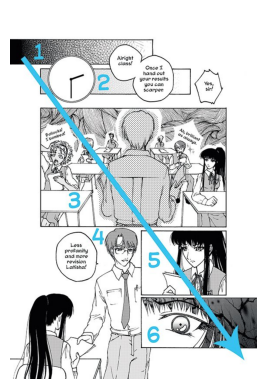

In [49]:
img = cv2.imread(image_paths[5])
# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [50]:
len(image_paths),len(labels)

(621, 621)

In [51]:
preprocessed_images = []

for img_path in image_paths:
    preprocessed_img = preprocess_image(img_path)
    preprocessed_images.append(preprocessed_img)

# Convert preprocessed images to numpy array
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# print(preprocessed_images)
# Split dataset into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(preprocessed_images, labels, test_size=0.05, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Data preprocessing completed.")
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of validation images:", val_images.shape)
print("Shape of validation labels:", val_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

Data preprocessing completed.
Shape of training images: (471, 224, 224, 3)
Shape of training labels: (471,)
Shape of validation images: (118, 224, 224, 3)
Shape of validation labels: (118,)
Shape of test images: (32, 224, 224, 3)
Shape of test labels: (32,)


In [52]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [53]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=7, validation_data=(val_images, val_labels), callbacks=[checkpoint])
# history = model.fit(train_images, train_labels, epochs=7, validation_data=(val_images, val_labels))

Epoch 1/7
15/15 [==============================] - ETA: 0s - loss: 1.9340 - accuracy: 0.6093
Epoch 1: val_accuracy improved from -inf to 0.68644, saving model to best_model.h5
15/15 [==============================] - 73s 5s/step - loss: 1.9340 - accuracy: 0.6093 - val_loss: 0.6714 - val_accuracy: 0.6864
Epoch 2/7
15/15 [==============================] - ETA: 0s - loss: 0.3477 - accuracy: 0.8705
Epoch 2: val_accuracy improved from 0.68644 to 0.82203, saving model to best_model.h5
15/15 [==============================] - 74s 5s/step - loss: 0.3477 - accuracy: 0.8705 - val_loss: 0.3647 - val_accuracy: 0.8220
Epoch 3/7
15/15 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9321
Epoch 3: val_accuracy improved from 0.82203 to 0.86441, saving model to best_model.h5
15/15 [==============================] - 75s 5s/step - loss: 0.1738 - accuracy: 0.9321 - val_loss: 0.3097 - val_accuracy: 0.8644
Epoch 4/7
15/15 [==============================] - ETA: 0s - loss: 0.0949 - acc

In [54]:
best_model = load_model('best_model.h5')
loss, accuracy = best_model.evaluate(test_images, test_labels)
print("Best Model Evaluation: Loss - {}, Accuracy - {}".format(loss, accuracy))

1/1 [==============================] - 4s 4s/step - loss: 0.1324 - accuracy: 0.9688
Best Model Evaluation: Loss - 0.13235527276992798, Accuracy - 0.96875


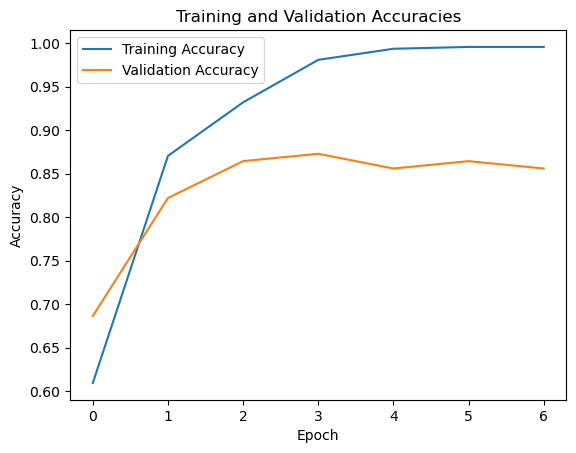

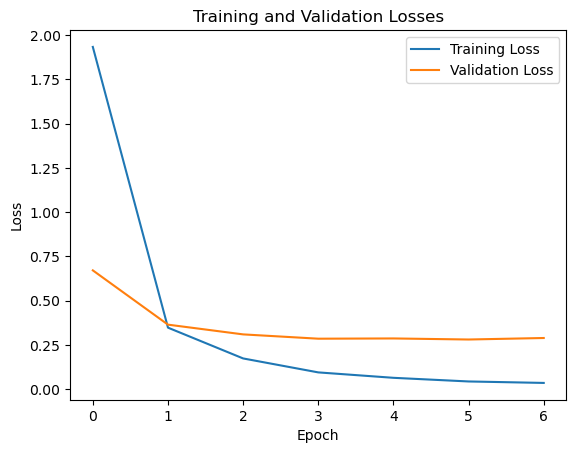

In [55]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
test_images.shape,test_labels.shape

((32, 224, 224, 3), (32,))

In [57]:
# Make predictions using the trained model
predicted_labels =[]
threshold = 0.5

for img in test_images:
    predictions = model.predict(np.expand_dims(img, axis=0))
    print(predictions[0][0])

# Convert probability to binary class label using the threshold
    binary_prediction = 1 if predictions[0][0] > threshold else 0

    print(binary_prediction)
    predicted_labels.append(binary_prediction)

# Print predictions
print("Predictions:", predicted_labels)

1/1 [==============================] - 0s 382ms/step
0.006988981
0
1/1 [==============================] - 0s 156ms/step
0.9990853
1
1/1 [==============================] - 0s 172ms/step
0.040266883
0
1/1 [==============================] - 0s 211ms/step
0.8296862
1
1/1 [==============================] - 0s 164ms/step
0.6501692
1
1/1 [==============================] - 0s 172ms/step
0.9988844
1
1/1 [==============================] - 0s 172ms/step
0.558445
1
1/1 [==============================] - 0s 172ms/step
0.975425
1
1/1 [==============================] - 0s 172ms/step
0.99712616
1
1/1 [==============================] - 0s 172ms/step
0.9975711
1
1/1 [==============================] - 0s 172ms/step
0.11960865
0
1/1 [==============================] - 0s 172ms/step
0.86975956
1
1/1 [==============================] - 0s 156ms/step
0.08926682
0
1/1 [==============================] - 0s 156ms/step
0.007196097
0
1/1 [==============================] - 0s 157ms/step
0.1618356
0
1/1 [============

In [58]:
accuracy_score(test_labels, predicted_labels,normalize=True, sample_weight=None)

0.90625

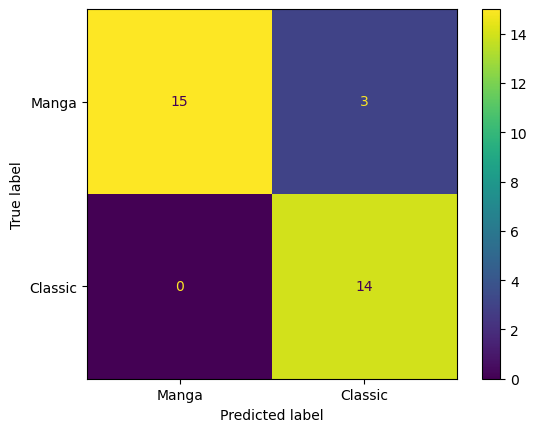

In [59]:
conf_mat = confusion_matrix(test_labels, predicted_labels)
ConfusionMatrixDisplay(conf_mat, display_labels=('Manga','Classic')).plot()
plt.show()

In [60]:
img = test_images[4]

In [61]:
predictions = model.predict(np.expand_dims(img, axis=0))
print(predictions[0][0])


1/1 [==============================] - 0s 157ms/step
0.6501692


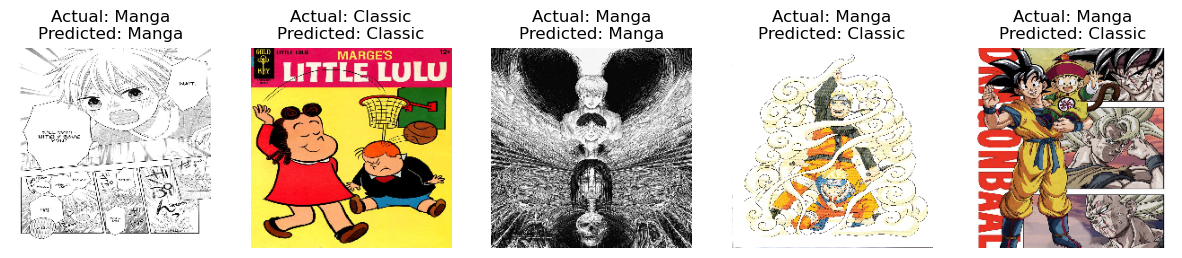

In [62]:
import matplotlib.pyplot as plt

def display_images_with_labels(test_images, test_labels, predicted_labels, class_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(test_images[i])
        actual_label = class_names[test_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        axes[i].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        axes[i].axis('off')
    plt.show()

num_images_to_display = 5
display_images_with_labels(test_images[:num_images_to_display], test_labels[:num_images_to_display], predicted_labels[:num_images_to_display], class_names=["Manga", "Classic"])